Census Income
Project Description
This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.
Description of fnlwgt (final weight)
The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:
1.	A single cell estimate of the population 16+ for each state.
2.	Controls for Hispanic Origin by age and sex.
3.	Controls by Race, age and sex.
We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.

Dataset Link-

https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv


Importing of Libraries

In [113]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
from sklearn.preprocessing import power_transform
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix, roc_curve, roc_auc_score
from sklearn.naive_bayes import GaussianNB
from imblearn.over_sampling import SMOTE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics  import roc_auc_score
import warnings
warnings.filterwarnings('ignore')

 Reading the csv file from dataset

In [114]:
Census= pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv')
Census

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


This dataset contain 32560 rows and 15 columns ,The dataset contains the details of the annual income of the persons. .Here the icome column is the target variable

In [115]:
Census.shape

(32560, 15)

In [116]:
Census.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [117]:
Census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [118]:
Census.columns = Census.columns.str.replace(' ', '_')
Census.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [119]:
Census.isnull().sum()     #no Missing  or Nan Values

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [120]:
Census.duplicated().sum()

24

In [121]:
#dropping duplicate rows and resetting index
Census=Census.drop_duplicates()
print('Number of rows after removing duplicates=', len(Census))

Number of rows after removing duplicates= 32536


In [122]:
Census.nunique()

Age                  73
Workclass             9
Fnlwgt            21647
Education            16
Education_num        16
Marital_status        7
Occupation           15
Relationship          6
Race                  5
Sex                   2
Capital_gain        119
Capital_loss         92
Hours_per_week       94
Native_country       42
Income                2
dtype: int64

<AxesSubplot:>

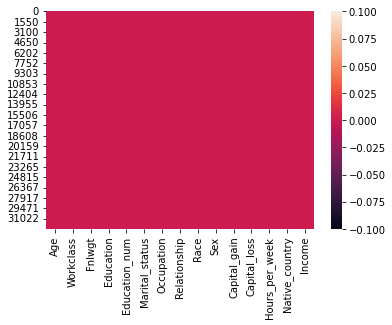

In [123]:
sns.heatmap(Census.isnull())

In [124]:
Census.duplicated().sum()

0

Univariate Analysis 'Subscribed' variable

In [125]:
#Frequency of 'subscribed'
Census['Income'].value_counts()

 <=50K    24697
 >50K      7839
Name: Income, dtype: int64

<AxesSubplot:xlabel='Income', ylabel='count'>

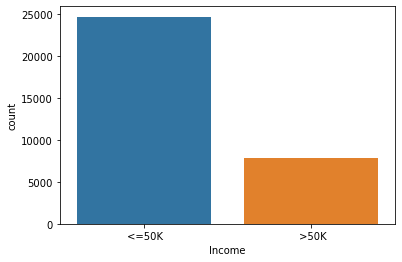

In [126]:
# Plotting the 'subscribed' frequency
sns.countplot(data=Census,x='Income')

In [127]:
#Normalizing the frequency table of 'Subscribed' variable
Census['Income'].value_counts(normalize=True)

 <=50K    0.759067
 >50K     0.240933
Name: Income, dtype: float64

In [128]:
#Frequency table
Census['Income'].value_counts()

 <=50K    24697
 >50K      7839
Name: Income, dtype: int64

# EDA

In [129]:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()
for i in Census.columns:
    if Census[i].dtypes=='object':
        Census[i]=enc.fit_transform(Census[i].values.reshape(-1,1))
Census

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,6.0,83311,9.0,13,2.0,4.0,0.0,4.0,1.0,0,0,13,39.0,0.0
1,38,4.0,215646,11.0,9,0.0,6.0,1.0,4.0,1.0,0,0,40,39.0,0.0
2,53,4.0,234721,1.0,7,2.0,6.0,0.0,2.0,1.0,0,0,40,39.0,0.0
3,28,4.0,338409,9.0,13,2.0,10.0,5.0,2.0,0.0,0,0,40,5.0,0.0
4,37,4.0,284582,12.0,14,2.0,4.0,5.0,4.0,0.0,0,0,40,39.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,4.0,257302,7.0,12,2.0,13.0,5.0,4.0,0.0,0,0,38,39.0,0.0
32556,40,4.0,154374,11.0,9,2.0,7.0,0.0,4.0,1.0,0,0,40,39.0,1.0
32557,58,4.0,151910,11.0,9,6.0,1.0,4.0,4.0,0.0,0,0,40,39.0,0.0
32558,22,4.0,201490,11.0,9,4.0,1.0,3.0,4.0,1.0,0,0,20,39.0,0.0


In [130]:
Census.dtypes

Age                 int64
Workclass         float64
Fnlwgt              int64
Education         float64
Education_num       int64
Marital_status    float64
Occupation        float64
Relationship      float64
Race              float64
Sex               float64
Capital_gain        int64
Capital_loss        int64
Hours_per_week      int64
Native_country    float64
Income            float64
dtype: object

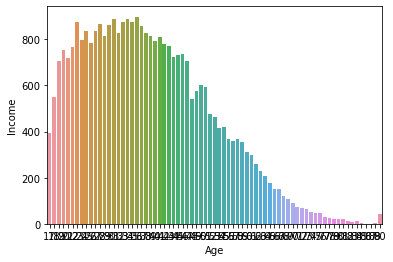

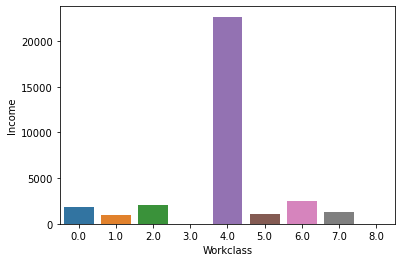

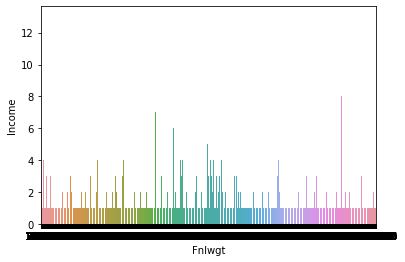

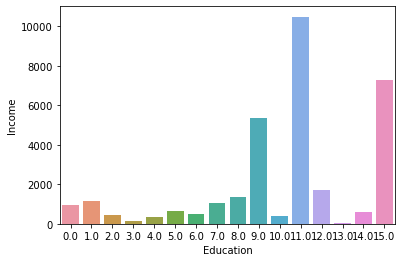

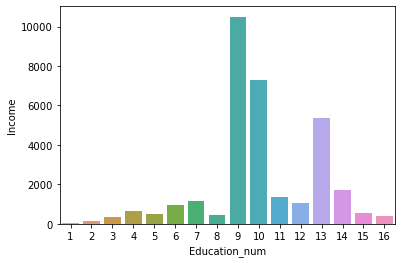

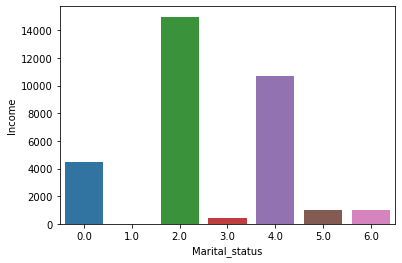

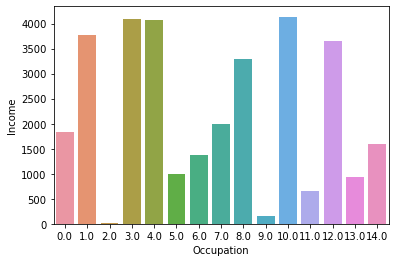

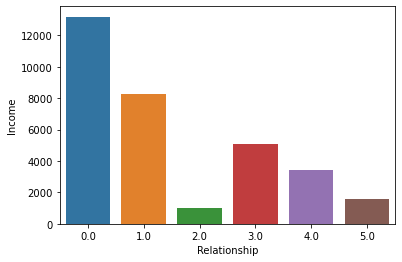

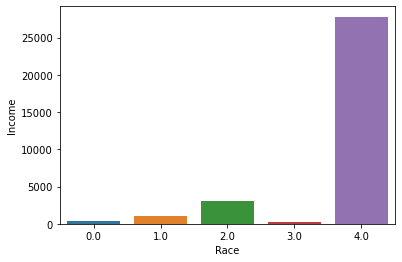

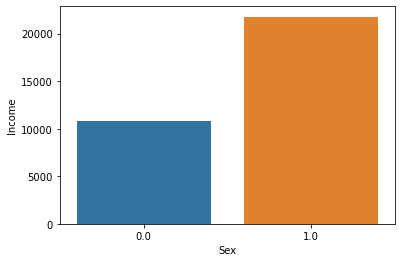

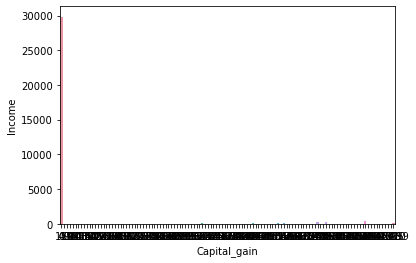

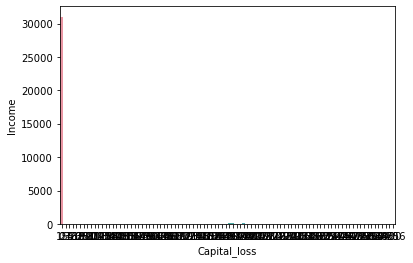

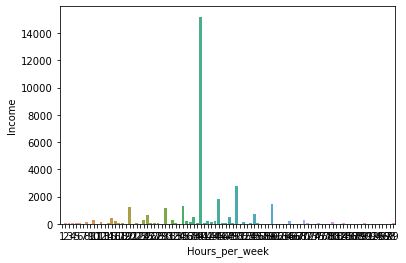

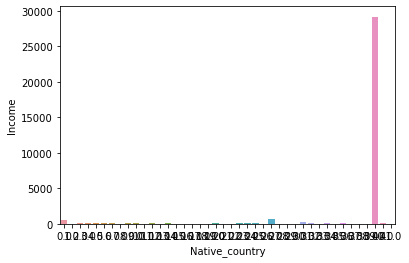

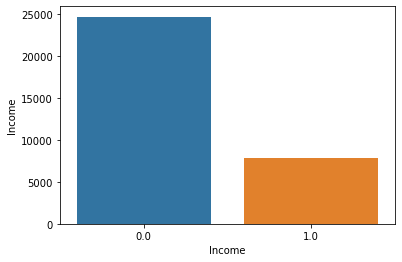

In [232]:
for column in Census.columns:
    sns.countplot(x=column, data=Census)
    plt.xlabel(column)
    plt.ylabel('Income')
    plt.show()

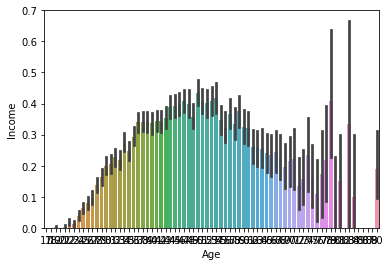

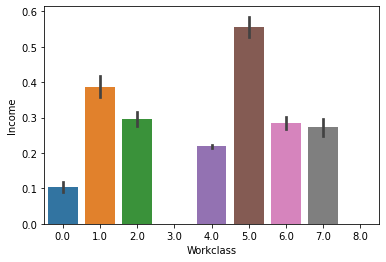

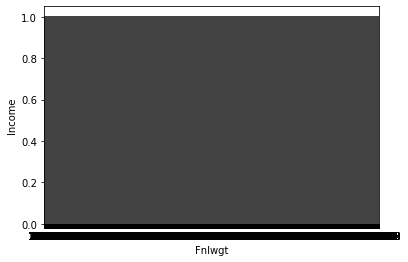

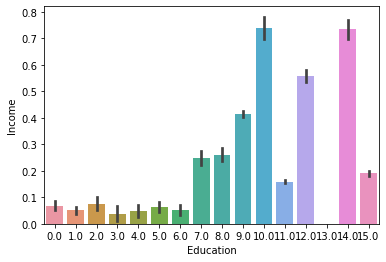

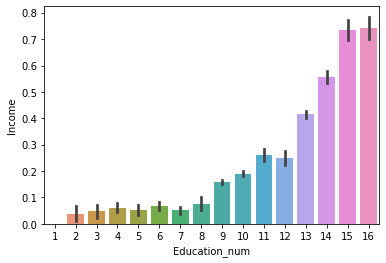

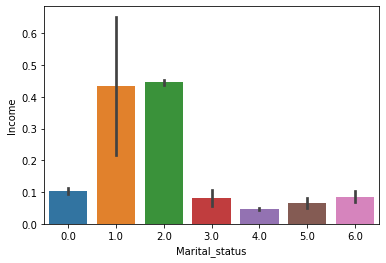

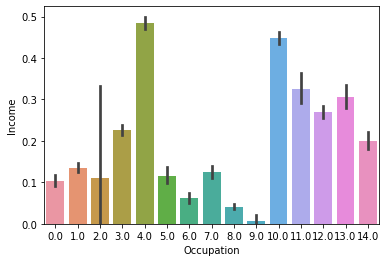

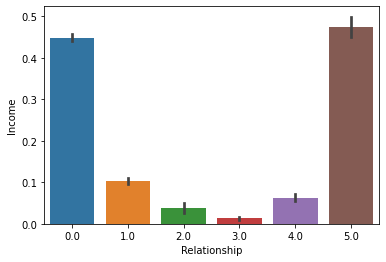

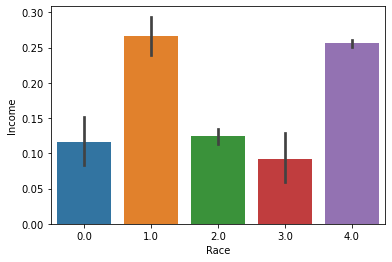

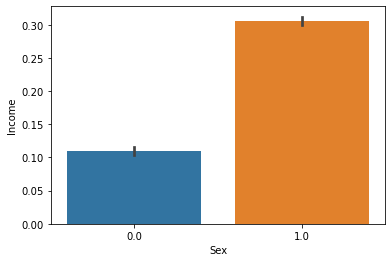

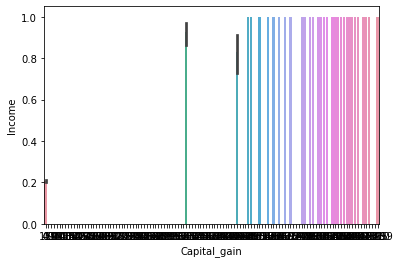

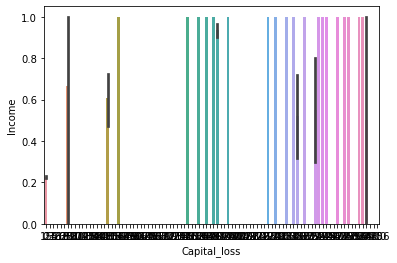

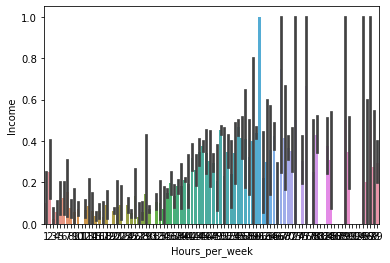

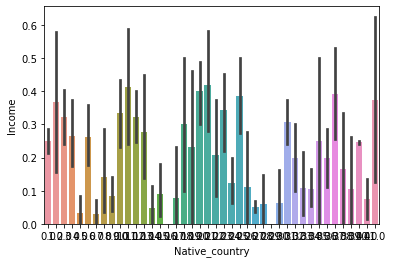

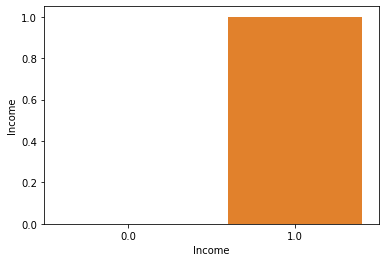

In [233]:
for column in Census.columns:
    sns.barplot(x=column, y='Income', data=Census)
    plt.xlabel(column)
    plt.show()

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Workclass'}>,
        <AxesSubplot:title={'center':'Fnlwgt'}>,
        <AxesSubplot:title={'center':'Education'}>],
       [<AxesSubplot:title={'center':'Education_num'}>,
        <AxesSubplot:title={'center':'Marital_status'}>,
        <AxesSubplot:title={'center':'Occupation'}>,
        <AxesSubplot:title={'center':'Relationship'}>],
       [<AxesSubplot:title={'center':'Race'}>,
        <AxesSubplot:title={'center':'Sex'}>,
        <AxesSubplot:title={'center':'Capital_gain'}>,
        <AxesSubplot:title={'center':'Capital_loss'}>],
       [<AxesSubplot:title={'center':'Hours_per_week'}>,
        <AxesSubplot:title={'center':'Native_country'}>,
        <AxesSubplot:title={'center':'Income'}>, <AxesSubplot:>]],
      dtype=object)

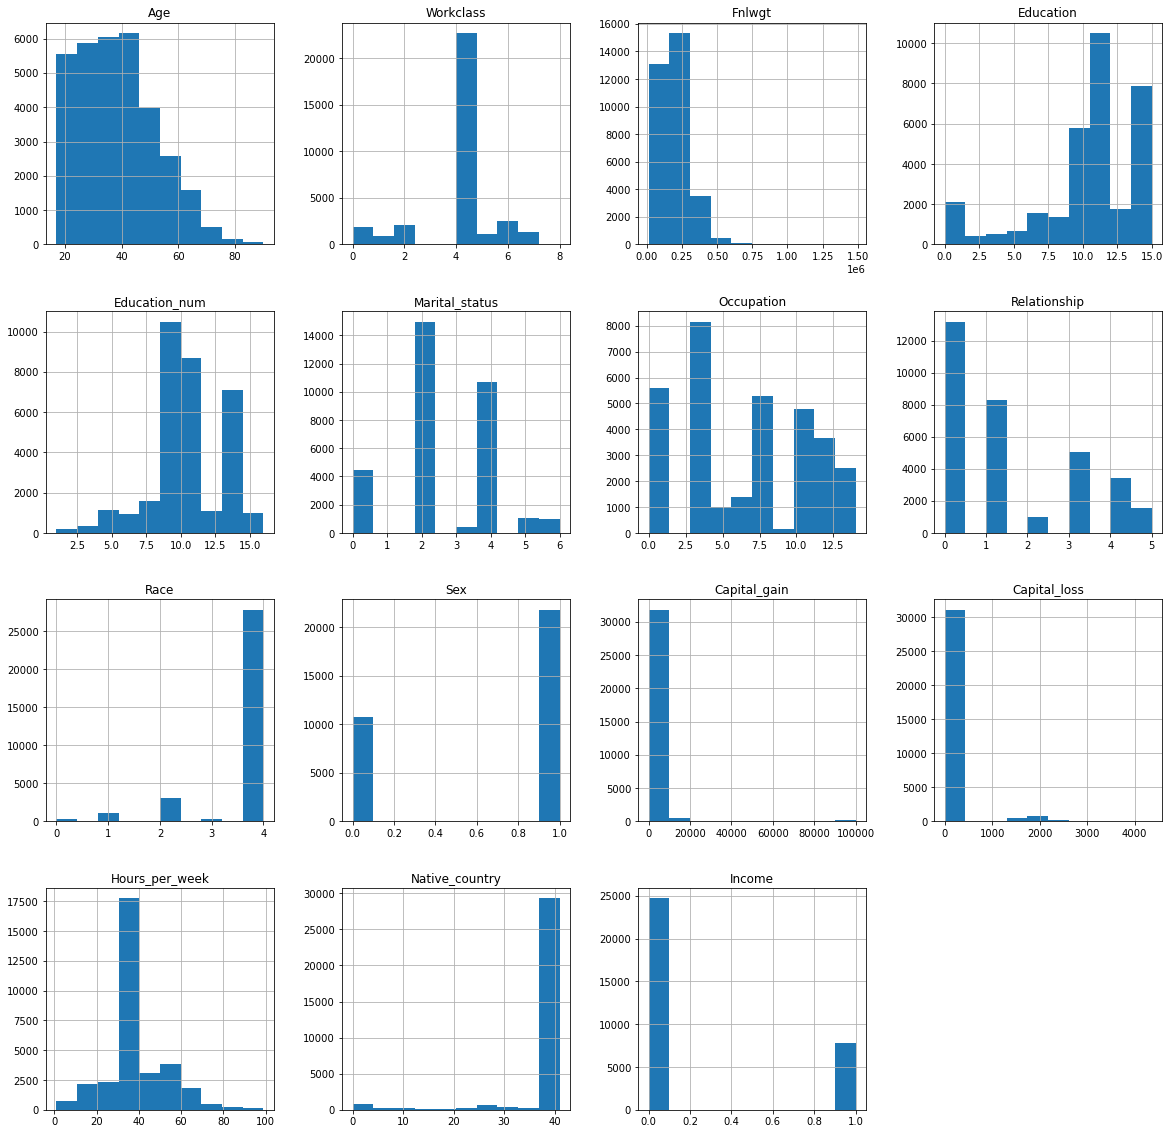

In [21]:
Census.hist(bins=10, figsize=(20,20))

Bivarate

In [132]:
Census.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

<AxesSubplot:xlabel='Workclass', ylabel='Income'>

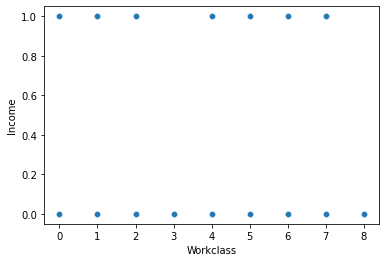

In [23]:
sns.scatterplot(x='Workclass',y='Income',data=Census)

<AxesSubplot:xlabel='Fnlwgt', ylabel='Income'>

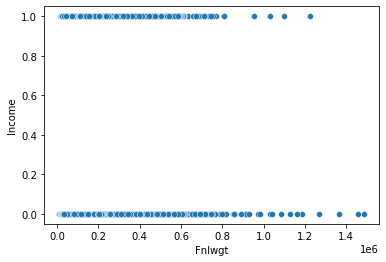

In [24]:
sns.scatterplot(x='Fnlwgt',y='Income',data=Census)

<AxesSubplot:xlabel='Education', ylabel='Income'>

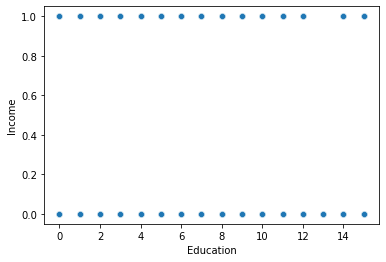

In [25]:
sns.scatterplot(x='Education',y='Income',data=Census)

<AxesSubplot:xlabel='Education_num', ylabel='Income'>

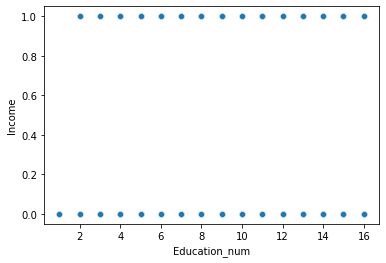

In [26]:
sns.scatterplot(x='Education_num',y='Income',data=Census)

<AxesSubplot:xlabel='Marital_status', ylabel='Income'>

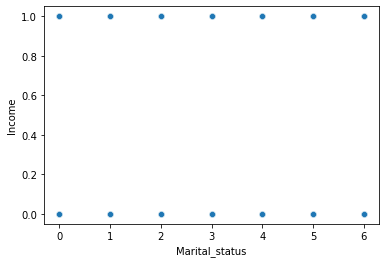

In [27]:
sns.scatterplot(x='Marital_status',y='Income',data=Census)

<AxesSubplot:xlabel='Occupation', ylabel='Income'>

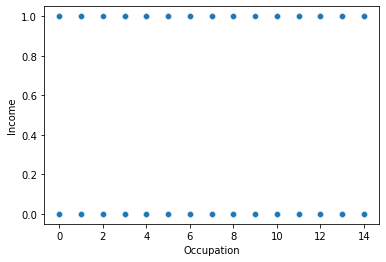

In [28]:
sns.scatterplot(x='Occupation',y='Income',data=Census)

<AxesSubplot:xlabel='Relationship', ylabel='Income'>

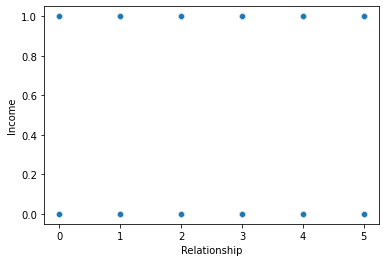

In [29]:
sns.scatterplot(x='Relationship',y='Income',data=Census)

<AxesSubplot:xlabel='Race', ylabel='Income'>

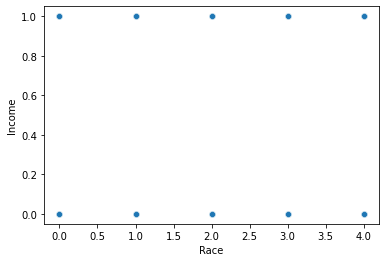

In [30]:
sns.scatterplot(x='Race',y='Income',data=Census)

<AxesSubplot:xlabel='Sex', ylabel='Income'>

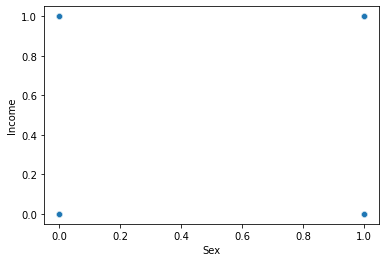

In [31]:
sns.scatterplot(x='Sex',y='Income',data=Census)

<AxesSubplot:xlabel='Capital_gain', ylabel='Income'>

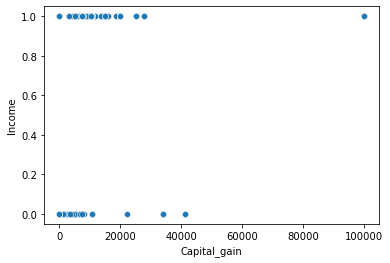

In [32]:
sns.scatterplot(x='Capital_gain',y='Income',data=Census)

<AxesSubplot:xlabel='Capital_loss', ylabel='Income'>

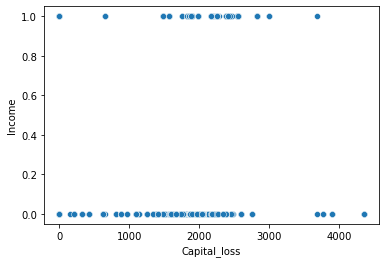

In [33]:
sns.scatterplot(x='Capital_loss',y='Income',data=Census)

<AxesSubplot:xlabel='Hours_per_week', ylabel='Income'>

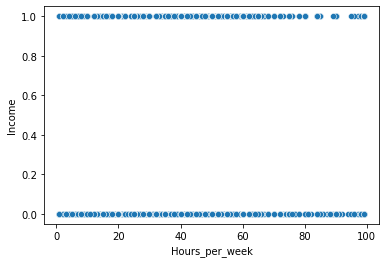

In [34]:
sns.scatterplot(x='Hours_per_week',y='Income',data=Census)

<AxesSubplot:xlabel='Native_country', ylabel='Income'>

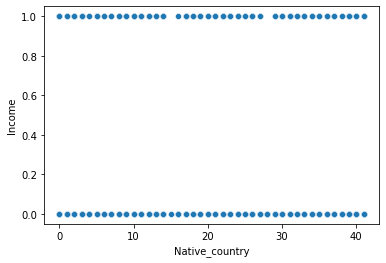

In [35]:
sns.scatterplot(x='Native_country',y='Income',data=Census)

<AxesSubplot:xlabel='Workclass', ylabel='Density'>

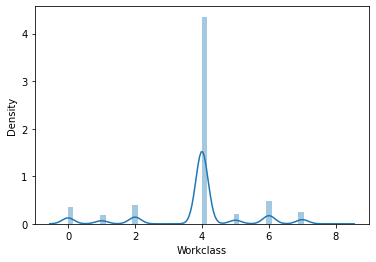

In [36]:
sns.distplot(Census['Workclass'])

<AxesSubplot:xlabel='Fnlwgt', ylabel='Density'>

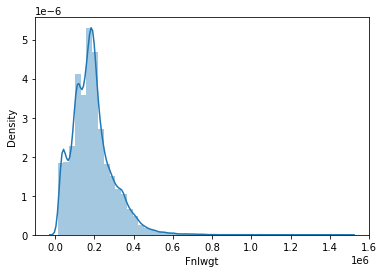

In [37]:
sns.distplot(Census['Fnlwgt'])

<AxesSubplot:xlabel='Education', ylabel='Density'>

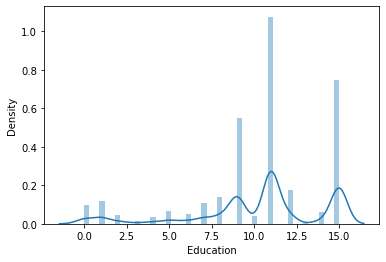

In [38]:
sns.distplot(Census['Education'])

<AxesSubplot:xlabel='Education_num', ylabel='Density'>

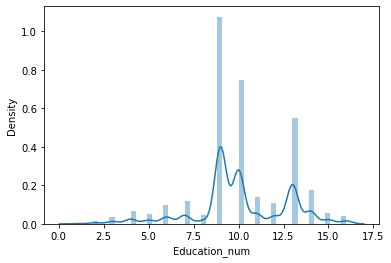

In [39]:
sns.distplot(Census['Education_num'])

<AxesSubplot:xlabel='Marital_status', ylabel='Density'>

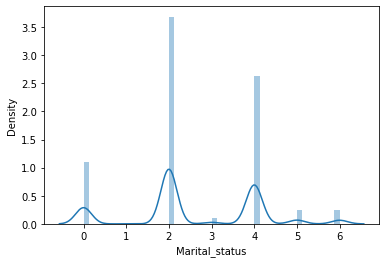

In [40]:
sns.distplot(Census['Marital_status'])

<AxesSubplot:xlabel='Occupation', ylabel='Density'>

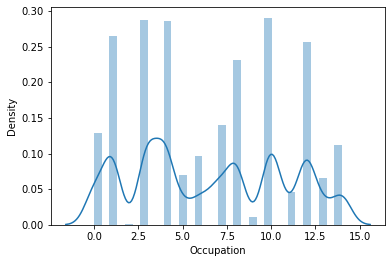

In [41]:
sns.distplot(Census['Occupation'])

<AxesSubplot:xlabel='Relationship', ylabel='Density'>

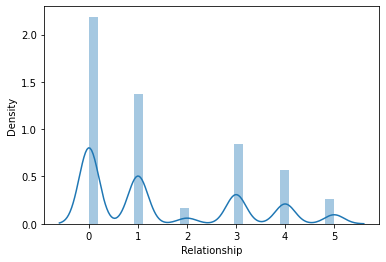

In [42]:
sns.distplot(Census['Relationship'])

<AxesSubplot:xlabel='Race', ylabel='Density'>

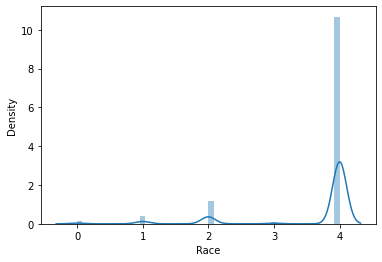

In [43]:
sns.distplot(Census['Race'])

<AxesSubplot:xlabel='Sex', ylabel='Density'>

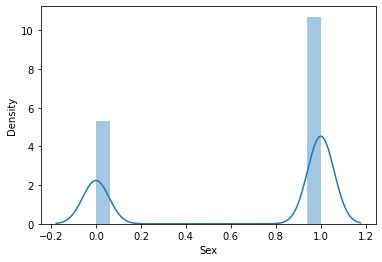

In [44]:
sns.distplot(Census['Sex'])

<AxesSubplot:xlabel='Capital_gain', ylabel='Density'>

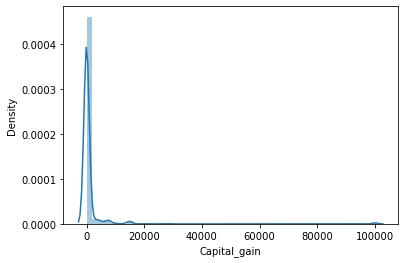

In [45]:
sns.distplot(Census['Capital_gain'])

<AxesSubplot:xlabel='Capital_loss', ylabel='Density'>

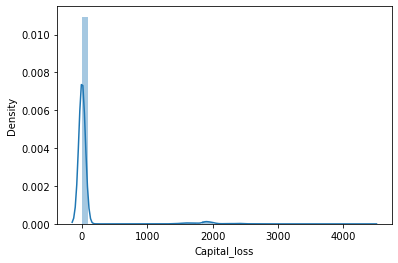

In [46]:
sns.distplot(Census['Capital_loss'])

<AxesSubplot:xlabel='Hours_per_week', ylabel='Density'>

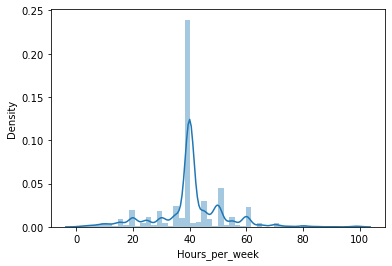

In [47]:
sns.distplot(Census['Hours_per_week'])

<AxesSubplot:xlabel='Native_country', ylabel='Density'>

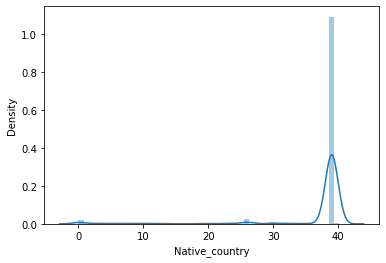

In [48]:
sns.distplot(Census['Native_country'])

<AxesSubplot:xlabel='Income', ylabel='Density'>

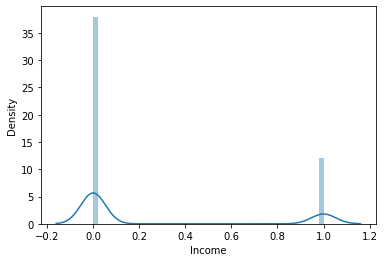

In [49]:
sns.distplot(Census['Income'])

 univarate Analysis
we can conclude that the average aged people are from 38-39 year
The minimum age of the people is 17 and max age people is 90
maximum people contribution is  from private sector and min or least contribution were from without pay and never worked
Fnlwgt is skewed
maximum educated people who contributed to census income were HS grad and from Some college and Bachelors 
least educated where from Preschool and 1st-4th
Married­civ­spouse corresponds to a civilian spouse 
Married­AF­spouse is a spouse in the Armed Forces.
max people who contributed to census income where married and minimum were seprated
occupation that contributed maximum to census income where Prof-specialty and least where from Armed Forces
count is high and maximum in Husband and the least is in other relative
The Counts of WHite in the race are maximum and Other are less...
The Count or contribution of male is more in income census as compared to Female
the average hours per week is 40 hrs ,which is contributing to census income
The United States country has highest count and other countries have very less counts. 
The average hours per week is 40 hrs ,which is contributing to census income
The count of people are more who are paid more than 50k in a year

Bivariate Analysis

Maximum People seems to be employed in United Stated and are paid above and below 50k
People who are working for more hours in a week are paid more as compared to the people who are working for less hours in a weeks
as the age of the people increase their salary also increases this may be because of experience 
More Male are paid income more than 50k than females and Female are less who are paid above 50k in comparision with male.. whereas more male are getting salary less than 50k in comparision with female
These are sector where people are working with different income group
Here we can see that White Race People are paid more as compared to black,asian pas islander, amer indian eskimo and other and are more employed
Here i can see that singles are having maximum income followed by Married people and least income is with Separated
he Income is more than 50K for the people having high education number. Here both gender have the income of more than 50K.
Here we can see that maximum income is paid to bachelors and the maximum people who are paid less than 50k belongs from HS-grad
The maximum income is paid to Prof-speciality and Exec-managerial and the least is paid to Armed forces and Priv House Ser
In Relationship Columns Husband income are paid more as compared to all other relationship





Multivariate Analysis

<Figure size 1800x2160 with 0 Axes>

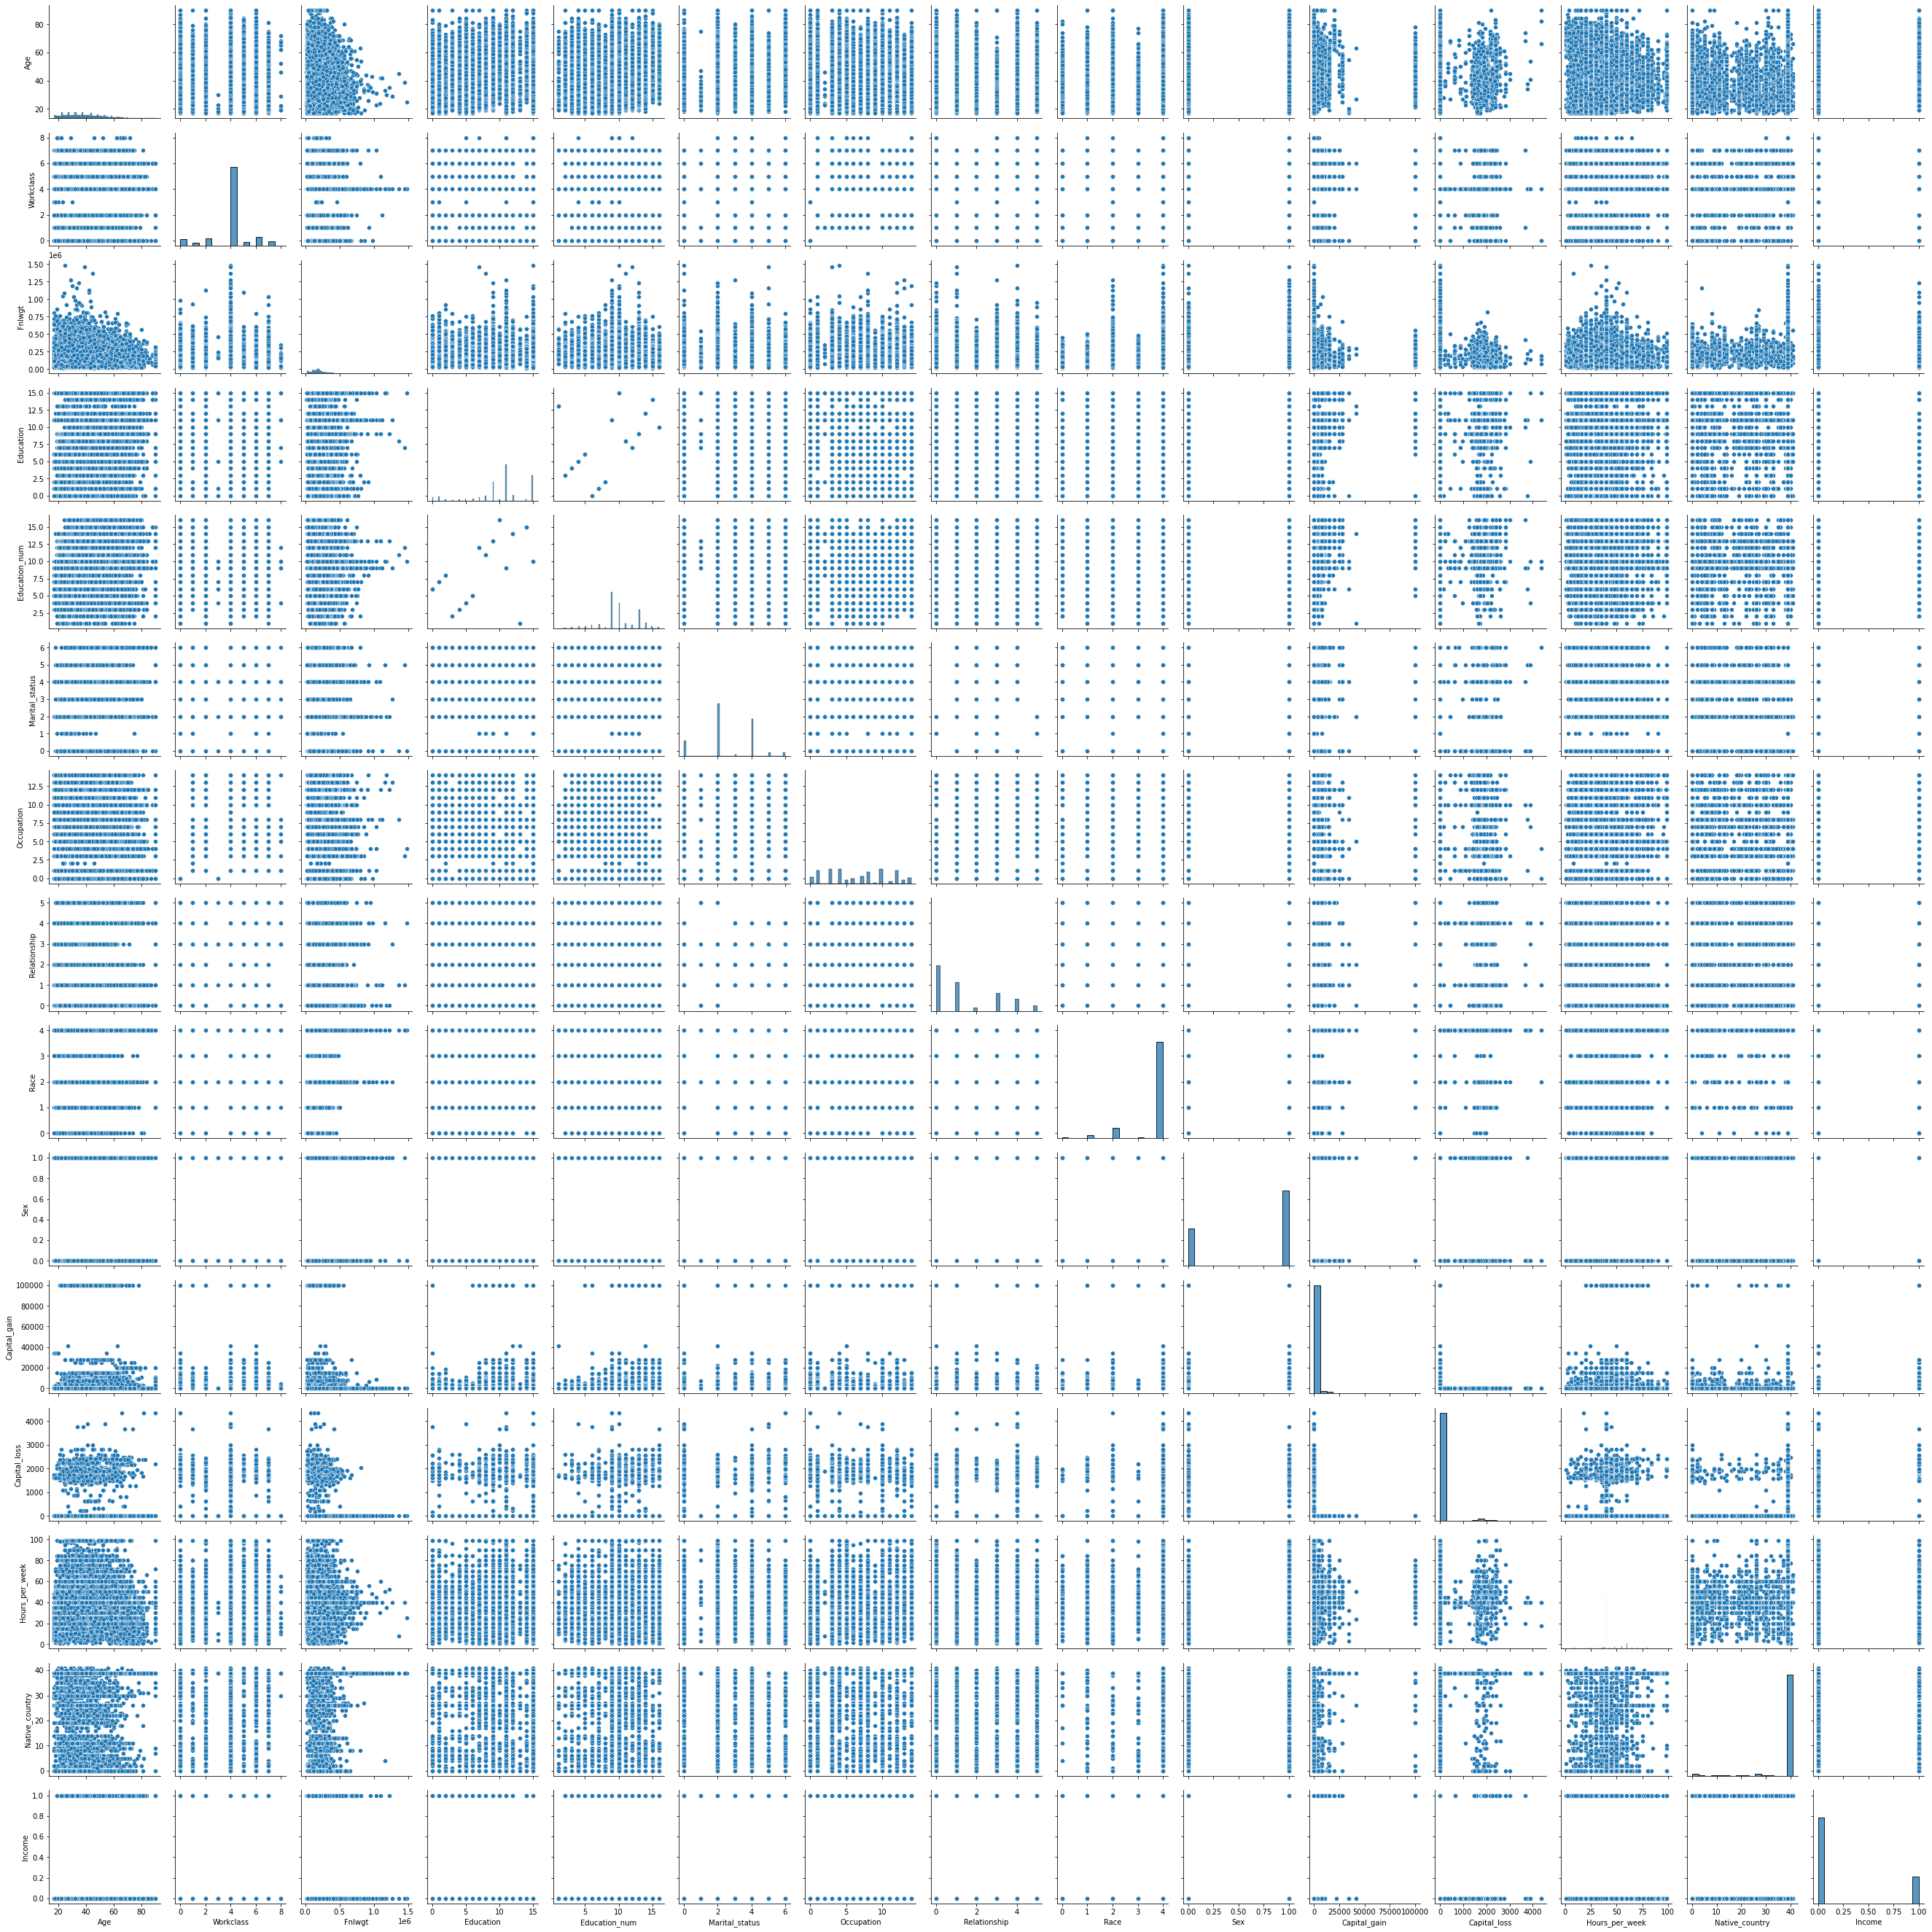

In [50]:
plt.figure(figsize=(25,30))
sns.pairplot(Census)
plt.show()

This pair plot gives the pairwise relation between the columns which is plotted on the basis of target variable "Income". Here we can observe the relation between the features and label.

Now Lets See that counts of each columns

In [133]:
for i in Census.columns:
        print(Census[i].value_counts())
        print('*'*100)

36    898
31    888
34    886
23    876
33    875
     ... 
83      6
88      3
85      3
86      1
87      1
Name: Age, Length: 73, dtype: int64
****************************************************************************************************
4.0    22673
6.0     2540
2.0     2093
0.0     1836
7.0     1297
5.0     1116
1.0      960
8.0       14
3.0        7
Name: Workclass, dtype: int64
****************************************************************************************************
123011    13
164190    13
203488    13
121124    12
126675    12
          ..
158040     1
232784     1
325573     1
140176     1
257302     1
Name: Fnlwgt, Length: 21647, dtype: int64
****************************************************************************************************
11.0    10494
15.0     7282
9.0      5352
12.0     1722
8.0      1382
1.0      1175
7.0      1067
0.0       933
5.0       645
14.0      576
6.0       514
2.0       433
10.0      413
4.0       332
3.0       166
13.0     

We can see that some columns are Negatively correlated and some are positively correlated ..Max positively correlated column is :- Education_num and Max Negetively column is :- Marital Status

<AxesSubplot:>

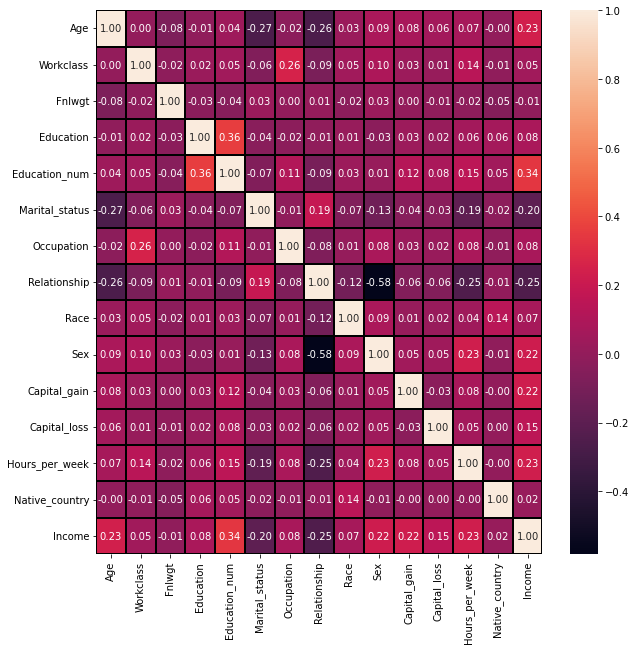

In [134]:
plt.figure(figsize = (10,10))
sns.heatmap(Census.corr(),annot=True,linewidths=0.1,linecolor="black",fmt="0.2f")

This heatmap shows the correlation matrix by visualizing the data. we can observe the relation between feature to feature and feature to label. This heat mapcontains both positive and negative correlation.

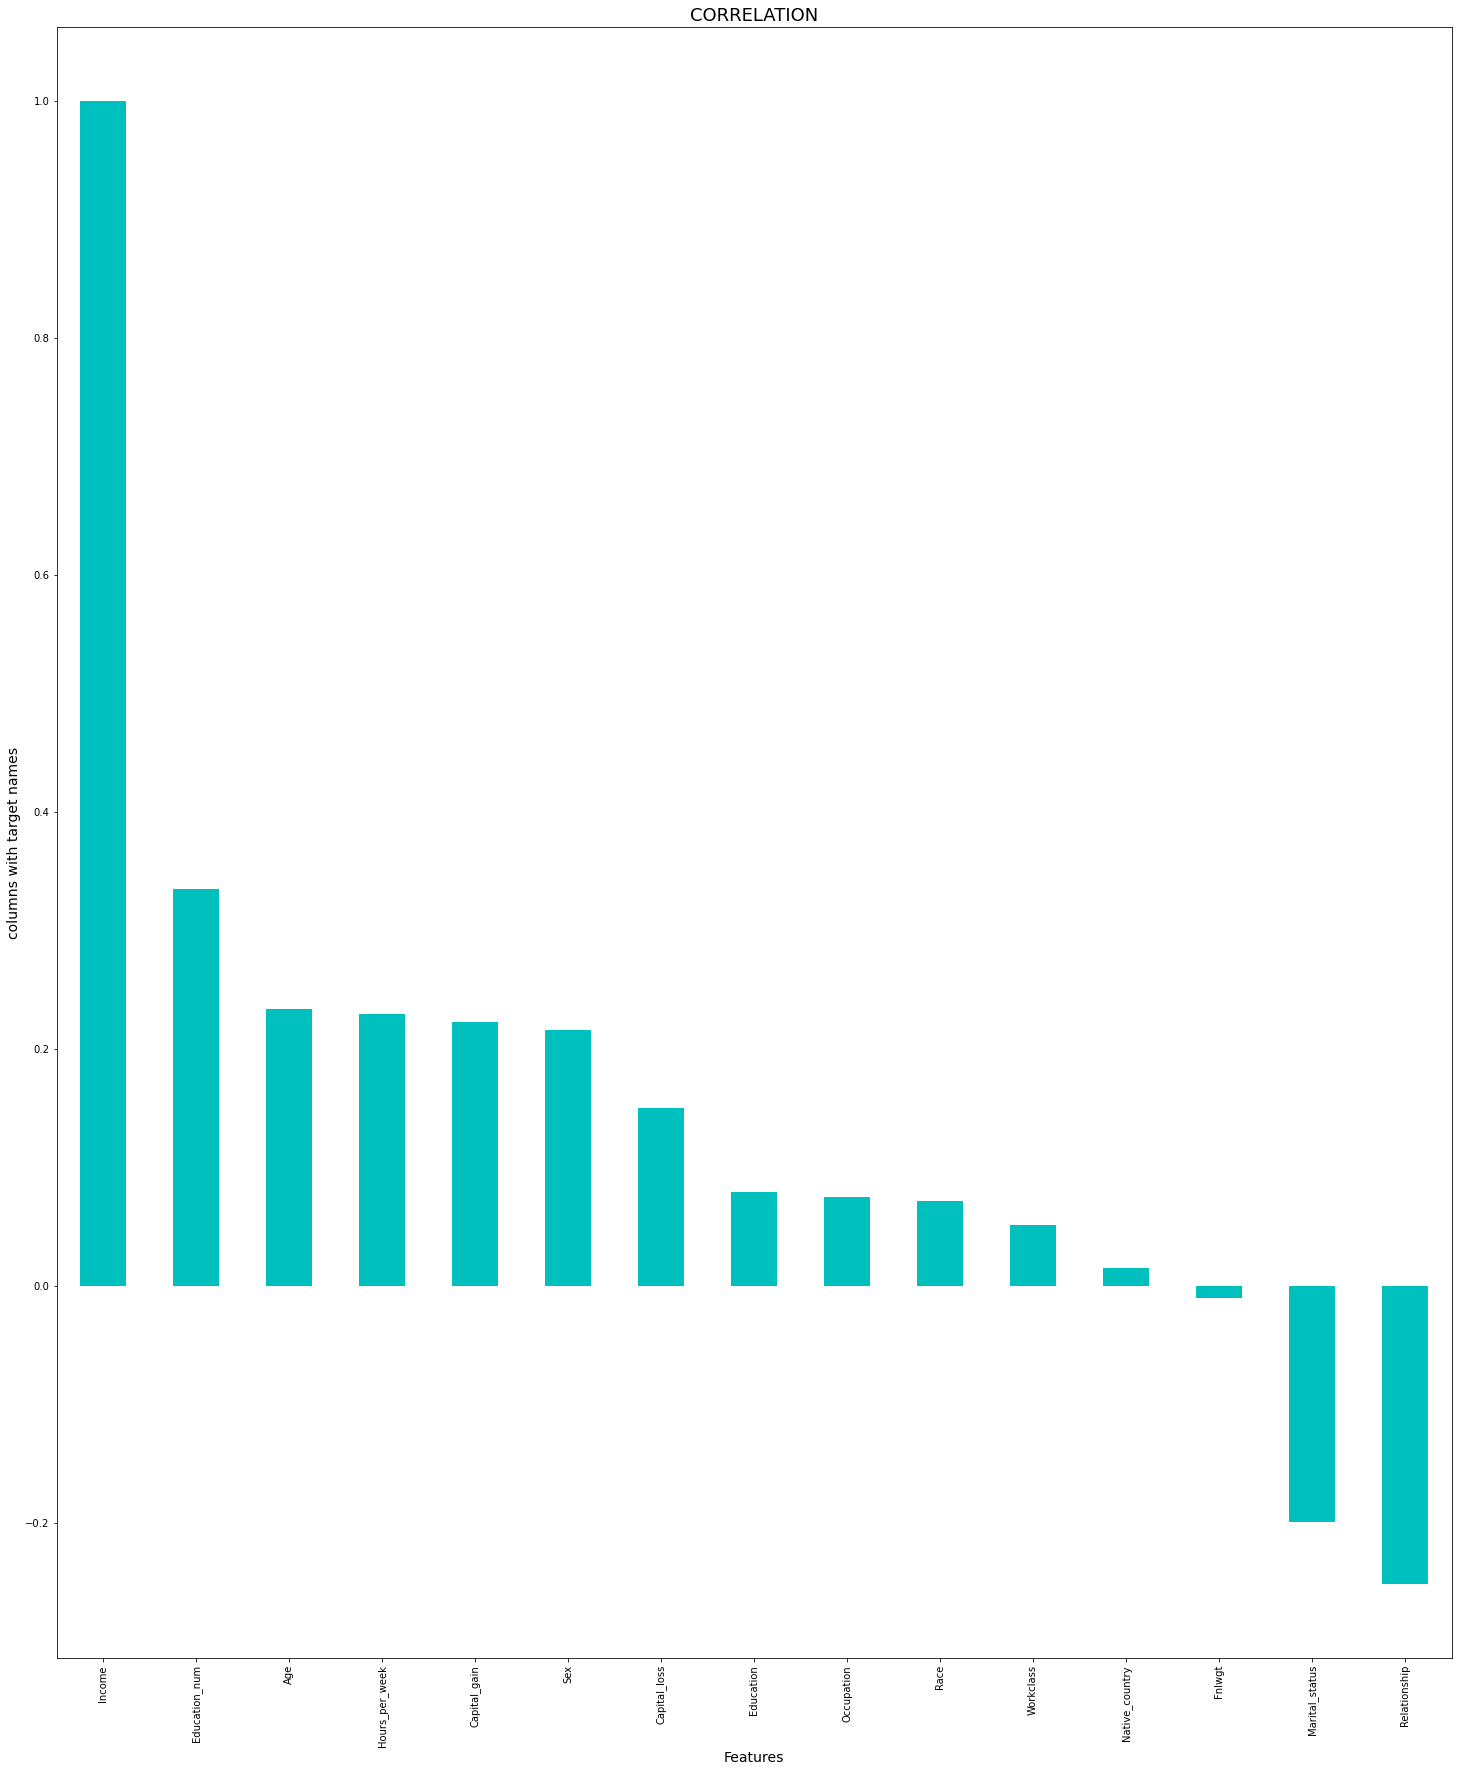

In [135]:
#checking the columns which are positively and negatively correlated
plt.figure(figsize=(25,30))
Census.corr()['Income'].sort_values(ascending=False).plot(kind='bar',color='c')
plt.xlabel('Features',fontsize=14)
plt.ylabel('columns with target names',fontsize=14)
plt.title('CORRELATION',fontsize=18)
plt.show()

In [54]:
#Census.drop(['Relationship','Marital_status'],axis=1)

In [136]:
Census.corr()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
Age,1.000000,0.003781,-0.076448,-0.010551,0.036224,-0.266142,-0.020911,-0.263744,0.029116,0.088708,0.077676,0.057745,0.068515,-0.001524,0.234039
Workclass,0.003781,1.000000,-0.016532,0.023480,0.052099,-0.064828,0.255105,-0.090421,0.049717,0.095960,0.033845,0.012255,0.139059,-0.007697,0.051706
Fnlwgt,-0.076448,-0.016532,1.000000,-0.028065,-0.043353,0.028154,0.001360,0.008859,-0.021484,0.027113,0.000433,-0.010267,-0.018900,-0.051866,-0.009521
Education,-0.010551,0.023480,-0.028065,1.000000,0.359105,-0.038413,-0.021249,-0.011060,0.014307,-0.027426,0.030086,0.016790,0.055991,0.063874,0.079361
Education_num,0.036224,0.052099,-0.043353,0.359105,1.000000,-0.069196,0.109804,-0.094424,0.031998,0.012181,0.122661,0.079901,0.148426,0.050127,0.335299
Marital_status,-0.266142,-0.064828,0.028154,-0.038413,-0.069196,1.000000,-0.009778,0.185542,-0.067942,-0.129425,-0.043373,-0.034134,-0.190433,-0.023414,-0.199187
Occupation,-0.020911,0.255105,0.001360,-0.021249,0.109804,-0.009778,1.000000,-0.075600,0.006811,0.080532,0.025513,0.017977,0.080502,-0.012394,0.075398
Relationship,-0.263744,-0.090421,0.008859,-0.011060,-0.094424,0.185542,-0.075600,1.000000,-0.116048,-0.582593,-0.057945,-0.061100,-0.248876,-0.005634,-0.250955
Race,0.029116,0.049717,-0.021484,0.014307,0.031998,-0.067942,0.006811,-0.116048,1.000000,0.087464,0.011152,0.018916,0.041921,0.137847,0.071855
Sex,0.088708,0.095960,0.027113,-0.027426,0.012181,-0.129425,0.080532,-0.582593,0.087464,1.000000,0.048486,0.045576,0.229190,-0.008262,0.215984


In [137]:
Census.corr()['Income'].sort_values()

Relationship     -0.250955
Marital_status   -0.199187
Fnlwgt           -0.009521
Native_country    0.015623
Workclass         0.051706
Race              0.071855
Occupation        0.075398
Education         0.079361
Capital_loss      0.150498
Sex               0.215984
Capital_gain      0.223340
Hours_per_week    0.229659
Age               0.234039
Education_num     0.335299
Income            1.000000
Name: Income, dtype: float64

# DESCRIPTIVE STATSTICS

In [138]:
Census.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,32536.0,38.585536,13.638193,17.0,28.0,37.0,48.00,90.0
Workclass,32536.0,3.868638,1.456363,0.0,4.0,4.0,4.00,8.0
Fnlwgt,32536.0,189784.298992,105556.258211,12285.0,117831.5,178356.0,236993.25,1484705.0
Education,32536.0,10.297547,3.870195,0.0,9.0,11.0,12.00,15.0
Education_num,32536.0,10.081725,2.571622,1.0,9.0,10.0,12.00,16.0
Marital_status,32536.0,2.611384,1.506304,0.0,2.0,2.0,4.00,6.0
Occupation,32536.0,6.573027,4.229473,0.0,3.0,7.0,10.00,14.0
Relationship,32536.0,1.446552,1.607087,0.0,0.0,1.0,3.00,5.0
Race,32536.0,3.665816,0.848858,0.0,4.0,4.0,4.00,4.0
Sex,32536.0,0.669228,0.470498,0.0,0.0,1.0,1.00,1.0


This gives the statistical information of the dataset. The summary of this dataset looks perfect since there is no negative/ invalid values present. It gives the summary of numerical data. From the above description we can observe the following things:

The counts of all the columns are same which means there are no null values present in the dataset. The mean value is greater than the median(50%) in fnlwgt, capital gain. The median is greater than the mean in Capital loss,Hours per week,. There is a huge difference between mean and the standard deviation. In summarizing the data we can infer that there is a huge difference in max and 75% percentile means there are huge outliers present in the dataset. We will remove outliers using Zscore .

<AxesSubplot:>

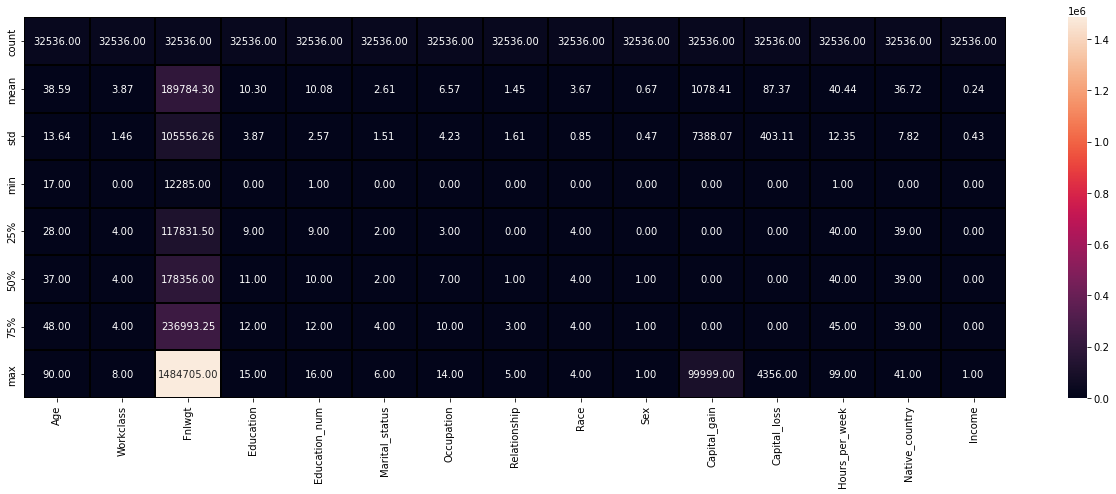

In [139]:
plt.figure(figsize = (22,7))
sns.heatmap(Census.describe(),annot=True,linewidths=0.1,linecolor="black",fmt="0.2f")

In [140]:
Census.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32536 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             32536 non-null  int64  
 1   Workclass       32536 non-null  float64
 2   Fnlwgt          32536 non-null  int64  
 3   Education       32536 non-null  float64
 4   Education_num   32536 non-null  int64  
 5   Marital_status  32536 non-null  float64
 6   Occupation      32536 non-null  float64
 7   Relationship    32536 non-null  float64
 8   Race            32536 non-null  float64
 9   Sex             32536 non-null  float64
 10  Capital_gain    32536 non-null  int64  
 11  Capital_loss    32536 non-null  int64  
 12  Hours_per_week  32536 non-null  int64  
 13  Native_country  32536 non-null  float64
 14  Income          32536 non-null  float64
dtypes: float64(9), int64(6)
memory usage: 5.0 MB


Now lets Check And Remove Outliers in the dataset 
OUTLIERS CHECKING(Any One outlier method can be used)OUTLIERS CHECKING(Any One outlier method can be  used)

In [141]:
colmlist=Census.columns.values
ncol=30
nrows=14

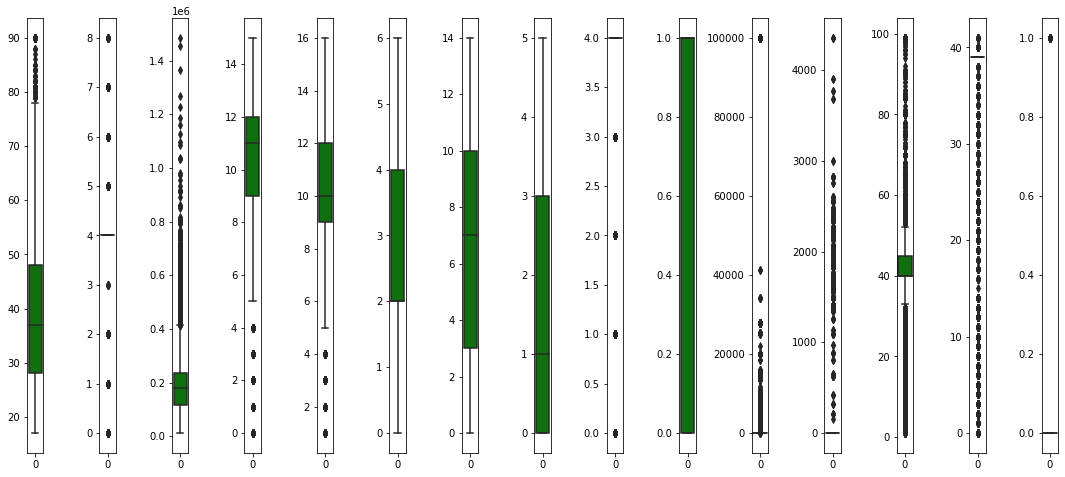

In [142]:
plt.figure(figsize=(ncol,3*ncol))
for i in range (0,len(colmlist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(data=Census[colmlist[i]],color='green',orient='v')
    plt.tight_layout()

Age                  AxesSubplot(0.125,0.125;0.0435393x0.755)
Workclass         AxesSubplot(0.177247,0.125;0.0435393x0.755)
Fnlwgt            AxesSubplot(0.229494,0.125;0.0435393x0.755)
Education         AxesSubplot(0.281742,0.125;0.0435393x0.755)
Education_num     AxesSubplot(0.333989,0.125;0.0435393x0.755)
Marital_status    AxesSubplot(0.386236,0.125;0.0435393x0.755)
Occupation        AxesSubplot(0.438483,0.125;0.0435393x0.755)
Relationship       AxesSubplot(0.49073,0.125;0.0435393x0.755)
Race              AxesSubplot(0.542978,0.125;0.0435393x0.755)
Sex               AxesSubplot(0.595225,0.125;0.0435393x0.755)
Capital_gain      AxesSubplot(0.647472,0.125;0.0435393x0.755)
Capital_loss      AxesSubplot(0.699719,0.125;0.0435393x0.755)
Hours_per_week    AxesSubplot(0.751966,0.125;0.0435393x0.755)
Native_country    AxesSubplot(0.804213,0.125;0.0435393x0.755)
Income            AxesSubplot(0.856461,0.125;0.0435393x0.755)
dtype: object

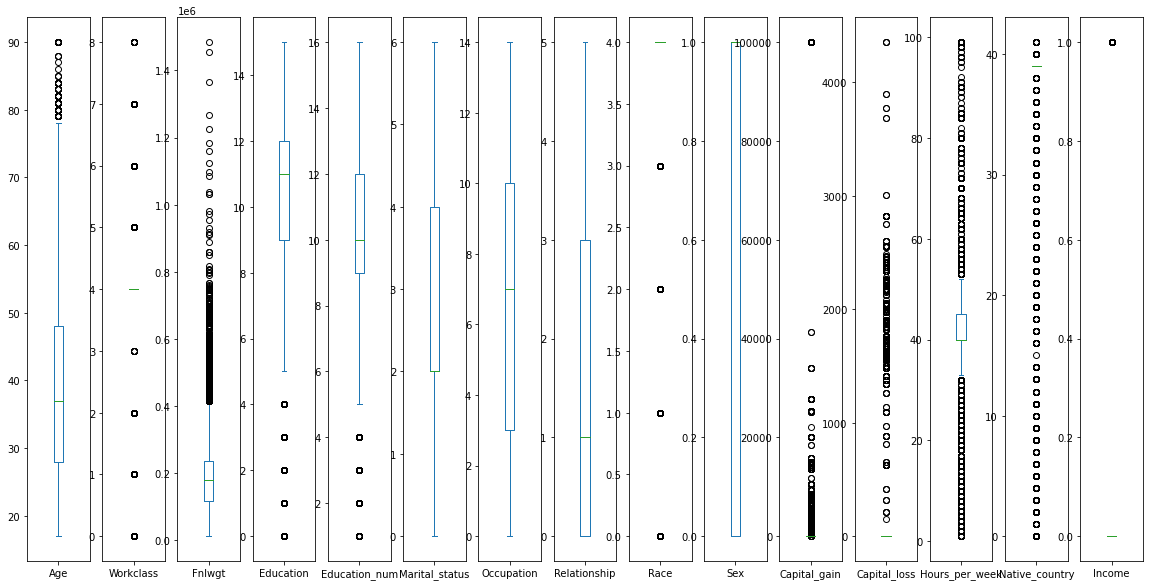

In [143]:
# to find out outliers in the dataset
Census.plot(kind='box',subplots=True,figsize=(20,10))

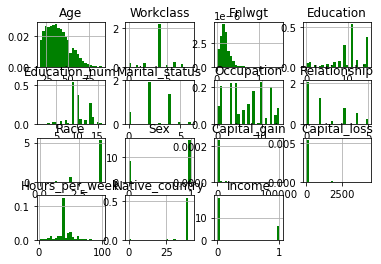

In [144]:
#Lets plot all using Histogram and see the skewness again
 
#plt.rcParams['figure.figsize']=(20,20)
Census.hist(bins=25,color='green',density=True,label='Value',histtype='bar')
plt.show()

In [145]:
#to check for outliers through zscore 
from scipy.stats import zscore
(np.abs(zscore( Census)) < 3).all()

Age               False
Workclass          True
Fnlwgt            False
Education          True
Education_num     False
Marital_status     True
Occupation         True
Relationship       True
Race              False
Sex                True
Capital_gain      False
Capital_loss      False
Hours_per_week    False
Native_country    False
Income             True
dtype: bool

In [146]:
#to remove outliers in data set through zscore
z = np.abs(zscore( Census))
z.shape

(32536, 15)

In [152]:
threshold = 3
print(np.where(z>3))

(array([    3,     9,    10, ..., 32508, 32526, 32528], dtype=int64), array([13, 12,  8, ...,  8,  8,  8], dtype=int64))


In [157]:
Census_new=Census[(z<3).all(axis=1)]
print(Census_new.shape)


(27399, 15)


In [158]:
Census.shape

(32536, 15)

In [159]:
print ("Old DataFrame =",Census.shape)
print ("New DataFrame =",Census_new.shape)
print ("Total dropped rows = ",Census.shape[0] - Census_new.shape[0])

Old DataFrame = (32536, 15)
New DataFrame = (27399, 15)
Total dropped rows =  5137


In [160]:
#to find % loss in data
loss = (32536-27399)/32536 * 100
print(loss)

15.788664863535775


In [161]:
Census_new

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,6.0,83311,9.0,13,2.0,4.0,0.0,4.0,1.0,0,0,13,39.0,0.0
1,38,4.0,215646,11.0,9,0.0,6.0,1.0,4.0,1.0,0,0,40,39.0,0.0
2,53,4.0,234721,1.0,7,2.0,6.0,0.0,2.0,1.0,0,0,40,39.0,0.0
4,37,4.0,284582,12.0,14,2.0,4.0,5.0,4.0,0.0,0,0,40,39.0,0.0
5,49,4.0,160187,6.0,5,3.0,8.0,1.0,2.0,0.0,0,0,16,23.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,4.0,257302,7.0,12,2.0,13.0,5.0,4.0,0.0,0,0,38,39.0,0.0
32556,40,4.0,154374,11.0,9,2.0,7.0,0.0,4.0,1.0,0,0,40,39.0,1.0
32557,58,4.0,151910,11.0,9,6.0,1.0,4.0,4.0,0.0,0,0,40,39.0,0.0
32558,22,4.0,201490,11.0,9,4.0,1.0,3.0,4.0,1.0,0,0,20,39.0,0.0


Now Lets Split the dataset into dependent and independent variable

In [162]:
# Independent column

x=Census_new.iloc[:,0:-1]
x

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country
0,50,6.0,83311,9.0,13,2.0,4.0,0.0,4.0,1.0,0,0,13,39.0
1,38,4.0,215646,11.0,9,0.0,6.0,1.0,4.0,1.0,0,0,40,39.0
2,53,4.0,234721,1.0,7,2.0,6.0,0.0,2.0,1.0,0,0,40,39.0
4,37,4.0,284582,12.0,14,2.0,4.0,5.0,4.0,0.0,0,0,40,39.0
5,49,4.0,160187,6.0,5,3.0,8.0,1.0,2.0,0.0,0,0,16,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,4.0,257302,7.0,12,2.0,13.0,5.0,4.0,0.0,0,0,38,39.0
32556,40,4.0,154374,11.0,9,2.0,7.0,0.0,4.0,1.0,0,0,40,39.0
32557,58,4.0,151910,11.0,9,6.0,1.0,4.0,4.0,0.0,0,0,40,39.0
32558,22,4.0,201490,11.0,9,4.0,1.0,3.0,4.0,1.0,0,0,20,39.0


In [163]:
x.shape

(27399, 14)

In [164]:
# Target or dependent variable

y=Census_new.iloc[:,-1]
y.shape

(27399,)

In [165]:
y

0        0.0
1        0.0
2        0.0
4        0.0
5        0.0
        ... 
32555    0.0
32556    1.0
32557    0.0
32558    0.0
32559    1.0
Name: Income, Length: 27399, dtype: float64

# TRANSFORMING DATA TO REMOVE SKEWNESS

In [166]:
Census

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,6.0,83311,9.0,13,2.0,4.0,0.0,4.0,1.0,0,0,13,39.0,0.0
1,38,4.0,215646,11.0,9,0.0,6.0,1.0,4.0,1.0,0,0,40,39.0,0.0
2,53,4.0,234721,1.0,7,2.0,6.0,0.0,2.0,1.0,0,0,40,39.0,0.0
3,28,4.0,338409,9.0,13,2.0,10.0,5.0,2.0,0.0,0,0,40,5.0,0.0
4,37,4.0,284582,12.0,14,2.0,4.0,5.0,4.0,0.0,0,0,40,39.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,4.0,257302,7.0,12,2.0,13.0,5.0,4.0,0.0,0,0,38,39.0,0.0
32556,40,4.0,154374,11.0,9,2.0,7.0,0.0,4.0,1.0,0,0,40,39.0,1.0
32557,58,4.0,151910,11.0,9,6.0,1.0,4.0,4.0,0.0,0,0,40,39.0,0.0
32558,22,4.0,201490,11.0,9,4.0,1.0,3.0,4.0,1.0,0,0,20,39.0,0.0


In [167]:
Census.skew()

Age                0.557657
Workclass         -0.751854
Fnlwgt             1.447695
Education         -0.934180
Education_num     -0.309454
Marital_status    -0.012692
Occupation         0.114542
Relationship       0.786514
Race              -2.435283
Sex               -0.719400
Capital_gain      11.949245
Capital_loss       4.592622
Hours_per_week     0.228752
Native_country    -3.661060
Income             1.211640
dtype: float64

In [168]:
from sklearn.preprocessing import power_transform
x_new=power_transform(Census,method='yeo-johnson')

In [169]:
pd.DataFrame(x_new).skew()

0    -0.013967
1     0.061229
2     0.016961
3    -0.309379
4     0.023862
5    -0.114050
6    -0.187189
7     0.123000
8    -2.010646
9    -0.719400
10    3.015495
11    4.297677
12    0.229590
13   -2.728041
14    1.211640
dtype: float64

In [170]:
# It will be a 2 dimensional data containg rows and columns

from sklearn.preprocessing import StandardScaler
#transforming my dataset into a standard normal distribution
sc=StandardScaler()

x= pd.DataFrame(sc.fit_transform(x), columns=x.columns)
x

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country
0,0.882431,1.474081,-1.086268,-0.345483,1.221822,-0.402967,-0.599341,-0.915307,0.344123,0.714844,-0.244970,-0.037465,-2.413051,0.193751
1,-0.012024,0.092929,0.310084,0.170201,-0.438440,-1.718613,-0.128201,-0.293012,0.344123,0.714844,-0.244970,-0.037465,0.007920,0.193751
2,1.106045,0.092929,0.511357,-2.408219,-1.268572,-0.402967,-0.128201,-0.915307,-2.961268,0.714844,-0.244970,-0.037465,0.007920,0.193751
3,-0.086562,0.092929,1.037473,0.428043,1.636888,-0.402967,-0.599341,2.196169,0.344123,-1.398906,-0.244970,-0.037465,0.007920,0.193751
4,0.807893,0.092929,-0.275099,-1.119009,-2.098703,0.254856,0.342939,-0.293012,-2.961268,-1.398906,-0.244970,-0.037465,-2.144054,-5.664810
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27394,-0.831942,0.092929,0.749624,-0.861167,0.806756,-0.402967,1.520788,2.196169,0.344123,-1.398906,-0.244970,-0.037465,-0.171411,0.193751
27395,0.137051,0.092929,-0.336436,0.170201,-0.438440,-0.402967,0.107369,-0.915307,0.344123,0.714844,-0.244970,-0.037465,0.007920,0.193751
27396,1.478734,0.092929,-0.362435,0.170201,-0.438440,2.228324,-1.306051,1.573874,0.344123,-1.398906,-0.244970,-0.037465,0.007920,0.193751
27397,-1.204631,0.092929,0.160715,0.170201,-0.438440,0.912678,-1.306051,0.951579,0.344123,0.714844,-0.244970,-0.037465,-1.785392,0.193751


In [171]:
x.mean()

Age              -1.119097e-16
Workclass        -3.633925e-16
Fnlwgt           -1.183525e-16
Education         7.934190e-16
Education_num     3.013150e-16
Marital_status    2.110109e-17
Occupation        3.086330e-16
Relationship      5.297335e-16
Race              5.213984e-16
Sex              -5.548481e-16
Capital_gain     -2.875015e-16
Capital_loss      1.148810e-15
Hours_per_week   -4.232964e-16
Native_country   -1.190184e-15
dtype: float64

In [172]:
x.std()

Age               1.000018
Workclass         1.000018
Fnlwgt            1.000018
Education         1.000018
Education_num     1.000018
Marital_status    1.000018
Occupation        1.000018
Relationship      1.000018
Race              1.000018
Sex               1.000018
Capital_gain      1.000018
Capital_loss      1.000018
Hours_per_week    1.000018
Native_country    1.000018
dtype: float64

In [174]:
Census['Income'].value_counts()

0.0    24697
1.0     7839
Name: Income, dtype: int64

Balancing the dataset over here,otherwise it will be a baised dataset

In [175]:
smt=SMOTE()
x,y=smt.fit_resample(x,y)

In [176]:
x.shape

(42526, 14)

In [177]:
y.value_counts()

0.0    21263
1.0    21263
Name: Income, dtype: int64

<AxesSubplot:xlabel='Income', ylabel='count'>

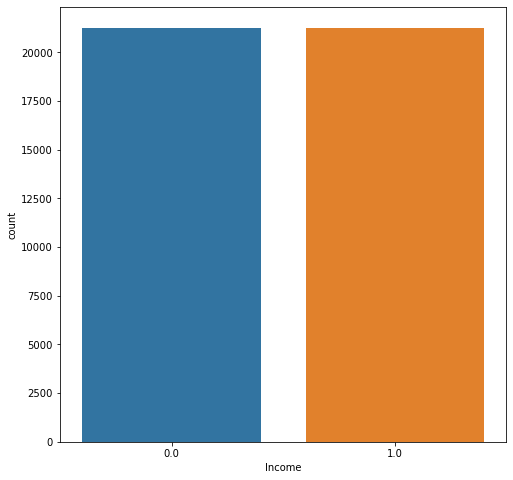

In [178]:
plt.figure(figsize=(8,8))
sns.countplot(y)

WE CHECK MULTICOLLINEARITY BY VARIANCE INFLATION FACTOR (VIF)

In [179]:
def vif_cal():
    vif=pd.DataFrame()
    vif["VIF FACTOR"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    vif["FEATURES"]=x.columns
    print (vif)

In [180]:
vif_cal()

    VIF FACTOR        FEATURES
0     1.201346             Age
1     1.072345       Workclass
2     1.024664          Fnlwgt
3     1.079043       Education
4     1.210931   Education_num
5     1.157342  Marital_status
6     1.079798      Occupation
7     2.019567    Relationship
8     1.052109            Race
9     1.875024             Sex
10    1.078585    Capital_gain
11    1.002115    Capital_loss
12    1.198358  Hours_per_week
13    1.026402  Native_country


# No Multicollinearity is present in the dataset...Here we can observe all the columns have VIF less than 10 which means we are free from multicollinearity problem. Let's move to buliding machine learning models...


In [90]:
# to predict best random state value
maxAcc =0
maxRS=0

for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=i)
    LR = LogisticRegression()
    LR.fit(x_train,y_train)
    predrf = LR.predict(x_test)
    acc=accuracy_score(y_test,predrf)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
print('Best accuracy is',maxAcc,'on Random_State',maxRS)

Best accuracy is 0.7788619797789795 on Random_State 56


In [181]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=56)

In [182]:
print('shape of x_train:',x_train.shape)
print('shape of y_train:',x_train.shape)
print('shape of x_test:',x_test.shape)
print('shape of y_test:',y_test.shape)

shape of x_train: (34020, 14)
shape of y_train: (34020, 14)
shape of x_test: (8506, 14)
shape of y_test: (8506,)


In [183]:
x_train

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country
22148,0.360665,0.092929,0.134072,1.201569,-0.023375,-0.402967,1.285219,-0.915307,0.344123,0.714844,-0.244970,-0.037465,-0.171411,0.193751
38279,0.062513,0.092929,0.051549,-0.345483,1.221822,1.515909,0.558959,1.742359,0.344123,-1.398906,-0.244970,-0.037465,0.661808,-2.735530
40569,-0.172431,0.092929,1.840721,0.170201,-0.438440,-0.402967,1.756358,-0.915307,0.344123,0.714844,-0.244970,-0.037465,0.469877,0.193751
32555,0.778749,1.474081,-0.180820,0.170201,-0.438440,-0.402967,-0.271664,-0.915307,0.344123,0.714844,2.973287,-0.037465,0.488827,0.193751
23069,0.137051,0.092929,0.985738,1.201569,-0.023375,-1.718613,-0.599341,-0.293012,0.344123,0.714844,-0.244970,-0.037465,0.456247,0.193751
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42106,-0.356219,0.092929,1.615857,-0.345483,1.221822,0.912678,1.507923,-0.293012,0.253866,-1.398906,-0.244970,-0.037465,0.505216,0.193751
25835,0.807893,0.092929,-0.636968,0.170201,-0.438440,-0.402967,1.285219,-0.915307,0.344123,0.714844,-0.244970,-0.037465,0.007920,0.193751
3264,0.584279,1.474081,-1.618978,0.170201,-0.438440,1.570501,-0.834911,1.573874,0.344123,0.714844,-0.244970,-0.037465,0.007920,0.193751
33167,-0.281884,0.092929,-0.289482,-0.345483,1.221822,0.912678,0.814079,0.153345,0.344123,0.714844,3.740812,-0.037465,0.295460,0.193751


In [184]:
y_test

3430     0.0
26453    0.0
15645    0.0
15467    0.0
37104    1.0
        ... 
22418    0.0
35241    1.0
35867    1.0
2493     1.0
18663    0.0
Name: Income, Length: 8506, dtype: float64

In [185]:
x_test

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country
3430,-1.428245,-2.669376,-0.113533,-2.408219,-1.268572,0.912678,-1.541621,0.951579,0.344123,-1.398906,-0.244970,-0.037465,-0.888736,0.193751
26453,-0.981018,0.092929,-0.049410,1.201569,-0.023375,0.912678,1.756358,-0.293012,0.344123,0.714844,-0.244970,-0.037465,1.352903,0.193751
15645,1.031507,0.092929,0.000140,0.170201,-0.438440,-1.718613,1.285219,-0.293012,0.344123,0.714844,-0.244970,-0.037465,0.007920,0.193751
15467,0.062513,0.092929,-1.105514,1.201569,-0.023375,-1.718613,-0.599341,1.573874,0.344123,-1.398906,-0.244970,19.013777,0.007920,0.193751
37104,1.472632,0.092929,0.367674,-0.345483,1.221822,-1.718613,-1.064052,-0.293012,0.344123,0.714844,-0.244970,-0.037465,0.007920,0.193751
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22418,0.137051,0.092929,-0.696216,1.201569,-0.023375,0.912678,1.285219,-0.293012,0.344123,0.714844,-0.244970,-0.037465,0.007920,0.193751
35241,-0.061923,0.783505,-0.072965,0.170201,-0.438440,-0.402967,-0.757040,-0.915307,0.344123,0.714844,-0.244970,-0.037465,0.007920,0.193751
35867,0.053404,0.092929,0.852082,1.201569,-0.023375,-0.402967,-0.599341,2.196169,0.344123,-1.398906,3.019537,-0.037465,0.007920,0.193751
2493,-0.161100,0.092929,0.008307,0.170201,-0.438440,-0.402967,1.285219,-0.915307,0.344123,0.714844,-0.244970,-0.037465,0.007920,0.193751


In [186]:
y_train

22148    1.0
38279    1.0
40569    1.0
32555    1.0
23069    0.0
        ... 
42106    1.0
25835    0.0
3264     0.0
33167    1.0
35300    1.0
Name: Income, Length: 34020, dtype: float64

CROSS VALIDATION FOR LOGISTICS REGRESSION,ENSEMBLE TECHNIQUE(GradientBoostingClassifier,RandomForestClassifier)

In [187]:
lg=LogisticRegression()
gnb=GaussianNB()
svc=SVC()
dtc=DecisionTreeClassifier()
knn=KNeighborsClassifier()
gb = GradientBoostingClassifier()
RF = RandomForestClassifier()
ada = AdaBoostClassifier()

model=[lg,gnb,svc,dtc,knn,RF,gb,ada]
for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print("Accuracy_score:",m,'is')
    print(confusion_matrix(y_test, predm))
    print(accuracy_score(y_test,predm))
    print(classification_report(y_test,predm))
    print('\n')

Accuracy_score: LogisticRegression() is
[[3271  962]
 [ 955 3318]]
0.7746296731718787
              precision    recall  f1-score   support

         0.0       0.77      0.77      0.77      4233
         1.0       0.78      0.78      0.78      4273

    accuracy                           0.77      8506
   macro avg       0.77      0.77      0.77      8506
weighted avg       0.77      0.77      0.77      8506



Accuracy_score: GaussianNB() is
[[3117 1116]
 [ 793 3480]]
0.7755701857512344
              precision    recall  f1-score   support

         0.0       0.80      0.74      0.77      4233
         1.0       0.76      0.81      0.78      4273

    accuracy                           0.78      8506
   macro avg       0.78      0.78      0.78      8506
weighted avg       0.78      0.78      0.78      8506



Accuracy_score: SVC() is
[[3268  965]
 [ 418 3855]]
0.8374088878438749
              precision    recall  f1-score   support

         0.0       0.89      0.77      0.83      423

In [188]:
#cross validation to check the accuracy score
print('cross validation score of random forest model = ', cross_val_score(RF,x,y,cv=None).mean())
print('cross validation score of logistic regression model = ', cross_val_score(lg,x,y,cv=None).mean())
print('cross validation score of decison tree model = ', cross_val_score(dtc,x,y,cv=None).mean())
print('cross validation score of  KNeighborsClassifier model = ', cross_val_score(knn,x,y,cv=None).mean())
print('cross validation score of standard vector machine model = ', cross_val_score(svc,x,y,cv=None).mean())
print('cross validation score of GaussianNB model = ', cross_val_score(gnb,x,y,cv=None).mean())
print('cross validation score of GradientBoostingClassifier model = ',cross_val_score(gb,x,y,cv=None).mean())
print('cross validation score of AdaBoostingClassifier model = ',cross_val_score(ada,x,y,cv=None).mean())

cross validation score of random forest model =  0.9005801016345207
cross validation score of logistic regression model =  0.7685887570042544
cross validation score of decison tree model =  0.8527743724974437
cross validation score of  KNeighborsClassifier model =  0.864248064754374
cross validation score of standard vector machine model =  0.8333491523015258
cross validation score of GaussianNB model =  0.7731035408418693
cross validation score of GradientBoostingClassifier model =  0.8630025767335378
cross validation score of AdaBoostingClassifier model =  0.847952725005263


Hyper parameter tuning

Plotting ROC and compare AUC for all the models used

In [189]:
# hyperparameter tuning with RandomForestClassifier, parameters of RandomForestClassifier
parameters ={'n_estimators':[200], 'criterion':['gini'], 
             'min_samples_split':[5], 'min_samples_leaf':[2], 
              'bootstrap':[True],'n_jobs':[-1], 'random_state':[34]}

In [190]:
# hyperparameter tuning with gridsearchCV
gcv = GridSearchCV(RandomForestClassifier(random_state=35), parameters, verbose=1, cv=10, n_jobs=-1)

In [191]:
#training the model
gcv.fit(x_train,y_train)

Fitting 10 folds for each of 1 candidates, totalling 10 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=35),
             n_jobs=-1,
             param_grid={'bootstrap': [True], 'criterion': ['gini'],
                         'min_samples_leaf': [2], 'min_samples_split': [5],
                         'n_estimators': [200], 'n_jobs': [-1],
                         'random_state': [34]},
             verbose=1)

In [192]:
#finding out which parameter is giving best accuracy
gcv.best_params_

{'bootstrap': True,
 'criterion': 'gini',
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 200,
 'n_jobs': -1,
 'random_state': 34}

In [193]:
type(gcv)

sklearn.model_selection._search.GridSearchCV

In [194]:
# finding best estimator
gcv.best_estimator_

RandomForestClassifier(min_samples_leaf=2, min_samples_split=5,
                       n_estimators=200, n_jobs=-1, random_state=34)

In [195]:
# Applying the parameters to the final model
pred = gcv.best_estimator_.predict(x_test)
acc =accuracy_score(y_test,pred)
print(acc*100)

89.64260521984482


ROC AUC Scores

In [198]:
#saving the model
import joblib
joblib.dump(gcv,'Census Income.pkl')

['Census Income.pkl']

In [199]:
#Loading the saved model
CI=joblib.load('Census Income.pkl')

In [200]:
prediction = CI.predict(x_test)
prediction

array([0., 0., 0., ..., 1., 1., 0.])

In [201]:
pd.DataFrame([CI.predict(x_test)[:],y_test[:]],index=["Predicted","Original"])

,0,1,2,3,4,5,6,7,8,9,...,8496,8497,8498,8499,8500,8501,8502,8503,8504,8505
Predicted,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0
Original,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0


<AxesSubplot:xlabel='Income', ylabel='Density'>

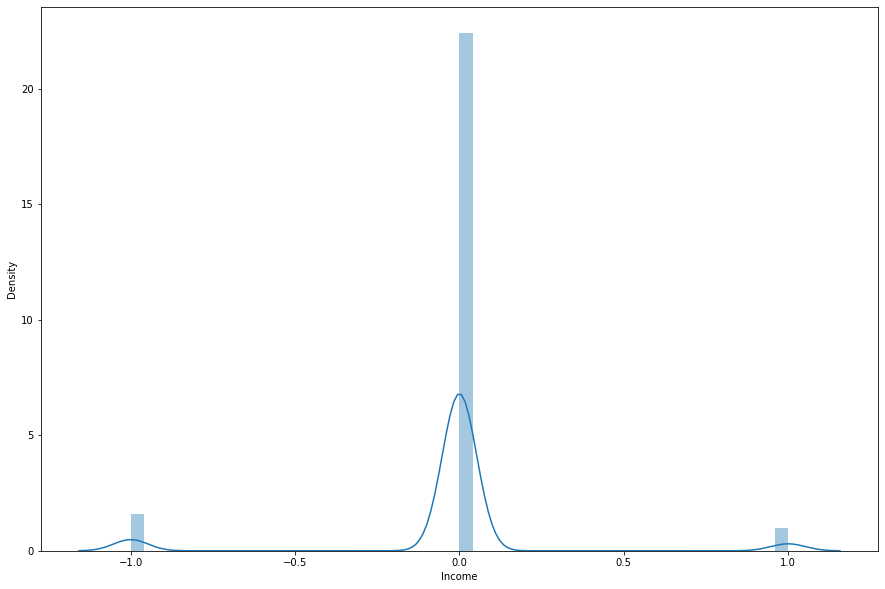

In [202]:
plt.figure(figsize=(15,10))
sns.distplot(y_test-prediction)

In [203]:
import pickle
filename = 'Census Income.pkl'
pickle.dump(gcv,open(filename, 'wb'))

In [204]:
loaded_model = pickle.load(open(filename, 'rb'))
predicted = loaded_model.score(x_test,y_test)*100
print(predicted)

89.64260521984482


Text(0.5, 1.0, 'AUC ROC plot')

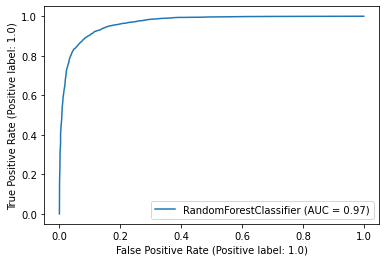

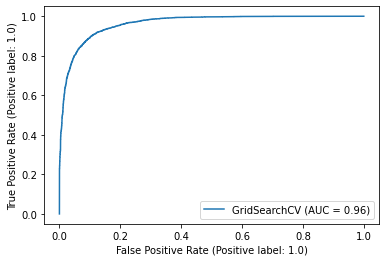

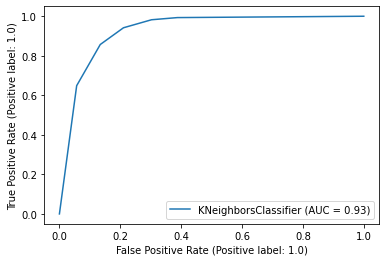

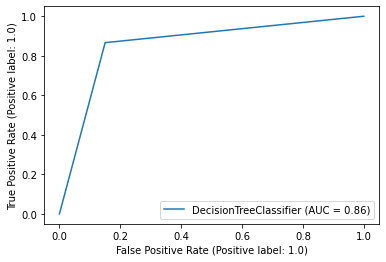

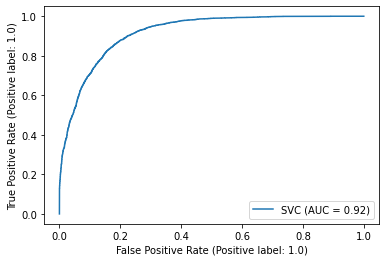

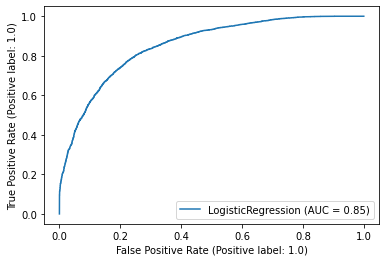

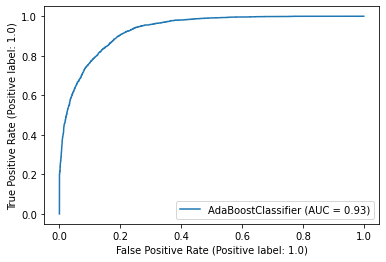

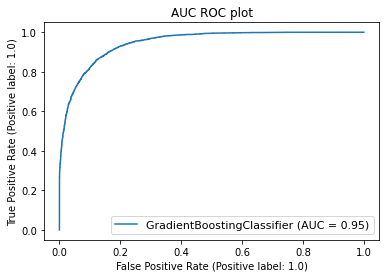

In [231]:
from sklearn.metrics import RocCurveDisplay
disp=RocCurveDisplay.from_estimator(RF, x_test, y_test)
svc_disp = RocCurveDisplay.from_estimator(gcv, x_test,y_test)
svc_disp = RocCurveDisplay.from_estimator(knn, x_test, y_test)
svc_disp = RocCurveDisplay.from_estimator(dtc, x_test, y_test)
svc_disp = RocCurveDisplay.from_estimator(svc, x_test, y_test)
svc_disp = RocCurveDisplay.from_estimator(lg, x_test, y_test)
svc_disp = RocCurveDisplay.from_estimator(ada, x_test, y_test)
svc_disp = RocCurveDisplay.from_estimator(gb, x_test, y_test)
#svc_disp = RocCurveDisplay.from_estimator(RF, x_test, y_test)
#rfc_disp = RocCurveDisplay.from_estimator(rfc, x_test, y_test, ax=svc_disp.ax_)
plt.legend(prop={'size':11}, loc='lower right')
plt.title("AUC ROC plot")


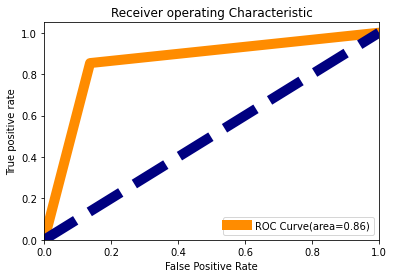

In [222]:
gsv=GridSearchCV
dtc.fit(x_train,y_train)
y_pred=dtc.predict(x_test)
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds=roc_curve(y_pred,y_test)
roc_auc=auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label='ROC Curve(area=%0.2f)' % roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True positive rate')
plt.title('Receiver operating Characteristic')
plt.legend(loc="lower right")
plt.show()